# Abstract:
A stochastic process is a mathematical model of a time-dependent state-system where transitions from one state to another are dictated by a set of probabilities. I will attempt to use a process based on Markov-Chains on the complete bipartite graph of 4 vertices and 4 edges for hamiltonian cycles (or walks) on the graph. However, a Markov-Chain requires the system to be "memory-less" of its previous states, as well as permitting loops and multiple directed edges, thus is the reason for this being a "markov-like" process. For transition matrices, the matrices commonly used for graph representation will be used. However, the rows of these matrices will have probabilites instead of $1$s, with an invariant that the entries in the rows all sum to $1$:

$$\sum_{j=1}^{n} a_{i,j} = \sum_{j=1}^{n} \mathbf{P}_{j}(X=x) = 1.$$
Note that we assume a discrete uniform probability distribution.

In [1]:
#Relevant imports and global function calls, as well as built-ins
from IPython.display import display, Markdown, Image
import numpy
numpy.set_printoptions(precision= 3, suppress=False)

# Examples:

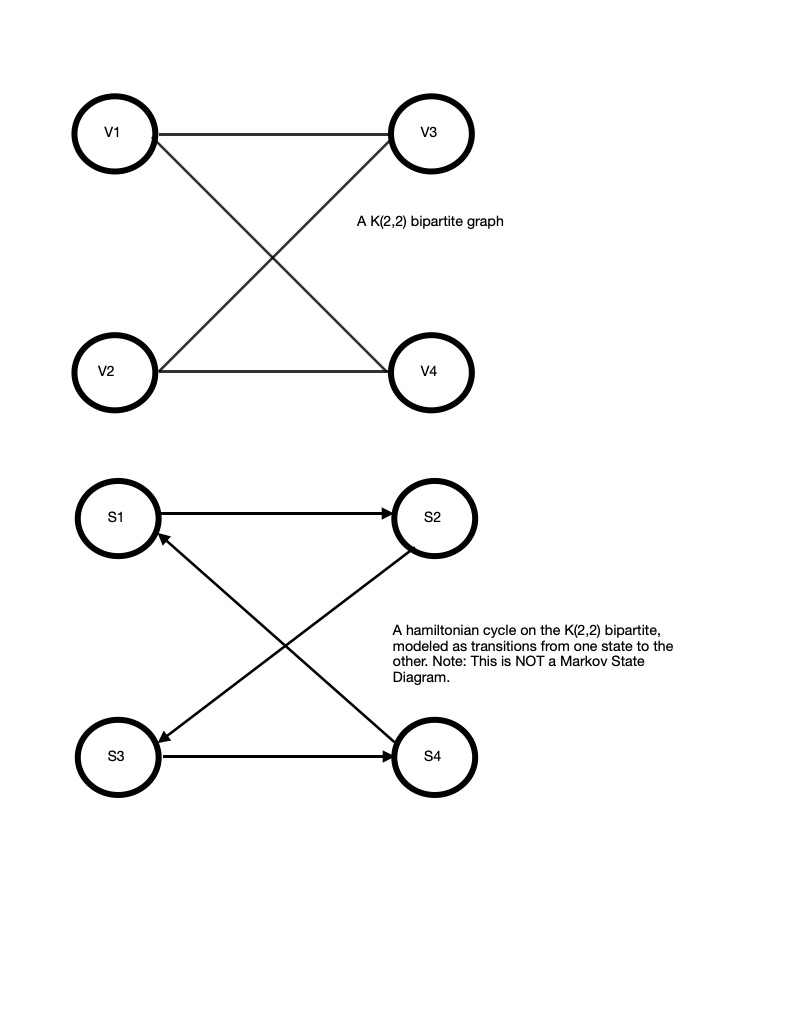

In [2]:
Image("GraphExample.jpg")

### Graph Representation:
We will use two matrices for our graph representation:
    - The graph's adjacency matrix A,
    - and the graph's incidence matrix I
    

In [3]:
#Important functions

#Function 1: xA_1 - all it does is perform the matrix multiplcation of a row vector x and a square matrix A0
def xA_1(vector_x, matrix_A):
    x_A = []
    for row in range(len(matrix_A)):
        lin_comb = 0
        for element in range(len(vector_x)):
            lin_comb += matrix_A[row][element]*vector_x[element] 
        x_A.append(lin_comb)    
    return(x_A)

#Function 2: xA_1 - works the same as xA but meant to handle numpy.arrays
def xA_2(vector_x, matrix_A):
    return(numpy.dot(matrix_A, vector_x))

#Function 3: gen_range - will make use of a generator to generate numbers without creating a list like range()
def gen_range(n):
    for i in range(n):
        yield i



In [4]:
#Adjacency matrix for the K(2,2) bipartite graph
A = numpy.array([[0,0,1,0],
                 [0,0,1,1],
                 [1,1,0,0],
                 [1,1,0,0]])

#Incidence matrix for the K(2,2) bipartite graph
I = numpy.array([[1,1,0,0],
                 [0,0,1,1],
                 [1,0,1,0],
                 [0,1,0,1]])
#Initial State Matrix - starting at vertex 1
S0 = numpy.array([1,0,0,0])

#Results from xA
print(xA_2(S0,A))

[0 0 1 1]


### Probability spaces:
We shall consider two spaces and for now, we present the first probability space. We know that the vertices on the $K_{2,2}$ bipartite graph are of the form:

$$
V = \{v_{1},v_{2},v_{3},v_{4}\} = \{v_{1},v_{2}\}\bigcup\{v_{3},v_{4}\},
$$

where $\{v_{1}, v_{2} \} \bigcap \{v_{3}, v_{4} \} = \emptyset$. We will then take our vertex set to be our random variable $X_{V}$.

#### Transition matrix 0:
Transition matrix using the shape of A and $P(X=v_{i}) = \frac{1}{4} = 0.5$ for all $v_{i}\in X_{V}$. Denoted as $A_{0}$ and an initial state matrix $S_{0} = \begin{bmatrix} 1 & 0& 0 & 0\end{bmatrix}$, where each entry corresponds to a vertex. The walk considered is $\{v_{1}, v_{3}, v_{2}, v_{4} \}$, so we **know** that the probability $P(X_{v}=v_{1}) = 1$ for $S_{0}$.


In [5]:
#Transition matrix 0
A0 = numpy.array([[0,0,0.5,0.5],
                  [0,0,0.5,0.5],
                  [0.5,0.5,0,0],
                  [0.5,0.5,0,0]])
#intial state matrix for A0
s0 = numpy.array([1,0,0,0])

for integer in gen_range(10_000_000):
    s0 = xA_2(s0,A0)
    
print("After 10 million iterations, we see a constant {}, we may call this a 'trivial' result.".format(s0))

After 10 million iterations, we see a constant [0.5 0.5 0.  0. ], we may call this a 'trivial' result.


This state matrix may *eventually* converge to the state matrix $s_{n=10000000} = \begin{bmatrix} 0.5 & 0.5& 0 & 0\end{bmatrix}$. This result may be called a "trivial" result and may be due to the fact that from any given vertex $v_{i}$, there can only be two choices to move to, hence a $50/50$ at all times.

#### Transition matrix 1:
This transition matrix' rows will have a distribution favoring the next state, from $s_{0}$ to $s_{1}$ which will correspond to the walk $\{v_{1},v_{3}\}$. Using the shape of $A$ and $X_{V}=\{v_{1}, v_{2}, v_{3}, v_{4}\} = \{0, 0, 0.8, 0.2\}$. Denoted as $A_{1}$ and an initial state matrix $s0 = \begin{bmatrix} 1 & 0& 0 & 0\end{bmatrix}$, where each entry corresponds to a vertex. The walk considered is $\{v_{1}, v_{3}, v_{2}, v_{4} \}$, so we **know** that the probability $P(X_{v}=v_{1}) = 1$ for $S_{0}$. 


In [6]:
#Transition matrix 1
A1 = numpy.array([[0,0,0.8,0.2],
                  [0,0,0.8,0.2],
                  [0.2,0.8,0,0],
                  [0.2,0.8,0,0]])

#intial state matrix for A1
s1 = S0

for integer in gen_range(10_000_000):
    s1 = xA_2(s1,A1)
print("After 10 million iterations, we see  {}".format(s1))

After 10 million iterations, we see  [0.2 0.2 0.  0. ]


This state matrix matrix may *eventually* converge to the state matrix $s_{n=10,000,000} = \begin{bmatrix} 0.2 & 0.8& 0 & 0\end{bmatrix}$.

#### Transition matrix 2:
This transition matrix' rows will have a distribution favoring the next state, from $s_{0}$ to $s_{1}$ which will correspond to the walk $\{v_{1},v_{3}\}$. Using the shape of $A$ and $X_{V}=\{v_{1}, v_{2}, v_{3}, v_{4}\} = \{0, 0, 0.65, 0.35\}$. Denoted as $A_{2}$ and an initial state matrix $s0 = \begin{bmatrix} 1 & 0& 0 & 0\end{bmatrix}$, where each entry corresponds to a vertex. The walk considered is $\{v_{1}, v_{3}, v_{2}, v_{4} \}$, so we **know** that the probability $P(X_{v}=v_{1}) = 1$ for $S_{0}$. 


In [41]:
#Transition matrix 2
A2 = numpy.array([[0,0,0.65,0.35],
                  [0,0,0.65,0.35],
                  [0.35,0.65,0,0],
                  [0.35,0.65,0,0]])

#intial state matrix for A2
s2 = S0

for integer in gen_range(10_000_000):
    s2 = xA_2(s2,A2)
print("After 10 million iterations, we see  {}".format(s2))

After 10 million iterations, we see  [0.35 0.65 0.   0.  ]


This state matrix matrix may *eventually* converge to the state matrix $s_{n=10,000,000} = \begin{bmatrix} 0.35 & 0.65& 0 & 0\end{bmatrix}$.

##### Observation 1:
It would seem that since we have chosen our initial state marix to be $S_{0} =\begin{bmatrix}1&0&0&0\end{bmatrix}$ the $n^{th}$ state matrix $S_{n}$ seems to be converging to the same distribution as our $X_{V}$'s, with the exact probabilities prescribed to the the vertices in $V_{1}$, instead of those in $V_{2}$ (a sort of 'shift' in proabilities). We will continue to use our initial state matrix $S_{0}$ for our calculations on the graph's incidence matrix $I$.